In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
import datetime as dt

import time


In [5]:
path = r'C:\Users\benre\Documents\astros Batting stats_files\astros_bangs_20200127.xlsx'

In [6]:
# Import sign stealing data as astro
# analysis conducted with the assumption that it is not reasonable for the batter to assume that no bang = Fastball
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
astro = pd.read_excel(path)
astro.head(5)

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id
0,1,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,B,Ball,f,f,f,1473,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:41-05,170404002442,32,ca9ed282-a9c3-45a6-ac10-d216fae7ce8b,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
1,2,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,F,Foul,f,f,f,1489,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:57-05,170404002458,33,7f89900c-faed-485c-a6b6-41c0a2b1c26f,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
2,3,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SL,BR,n,NaN,B,Ball,f,f,f,1512,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:20-05,170404002521,34,6c875b0c-b4e3-4521-b1c0-447ee785bff9,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
3,4,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,E,"In play, run(s)",f,f,f,1529,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:37-05,170404002538,35,1421aabe-7063-4902-9a46-4b2c239394cb,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
4,5,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Alex Bregman,Single,FF,FB,n,NaN,D,"In play, no out",f,f,f,1580,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:26:28-05,170404002636,40,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,136,117


In [7]:
# OT pitch category is so minescule we will drop
astro = astro[astro['pitch_category'] != 'OT']
astro.drop(['pitch_youtube_seconds','youtube_url','pitch_playid'], axis=1,inplace=True)

Calculating Astros team statistics

**Stat lines can be used as a method to analyize offensive performance. In Part Four we will use the astro dataframe to determine, Bases on balls(BB), Strike Outs(SO), At-Bats(AB), Plate Appearances(PA), Hit By Pitch (HBP), Sac FLy(SF), Single (S), Doubles(DO), Triple(TR), Home Runs(HR). Using these values we can calculate a standard array of perfromance metrics, used to assess a player. (In this case a team) 

In [8]:
# BB
# SO
# BA = Hits/AB's
# On-Base Percentage = OBP = (H+BB+HBP)(At Bats + BB + HBP + SF)
# Slugging Percentage = SLG = (1B + 2*B + 3*3B +4*HR)/AB
# On-Base Plus SluggingOPS = OBP + SLG
# Weighted On-base Average = wOBA = (0.690×uBB + 0.722×HBP + 0.888×1B + 1.271×2B + 1.616×3B + 2.101×HR) / (AB + BB – IBB + SF + HBP)
# Runs Created = RC = bangs = y and description = runs

In [9]:
# As in other parts creating a new dataframe based on PA outcomes so we dont duplicate at_bat_events
ab = astro.groupby('atbat_playid').tail(1)
ab.drop(columns=['game_id','game_pk','game_date','pitch_datetime','away_team_id','home_team_id','top_bottom'], inplace=True)
#Droping Catcher Interference Rows as they can skew results
ab.drop([37,1391,1457,2976], axis=0, inplace=True)
# Assess how many total PA's there are
ab['Line ID'].count()

2146

In [10]:
ab['at_bat_event'].unique()

array(['Home Run', 'Single', 'Strikeout', 'Double Play',
       'Grounded Into DP', 'Flyout', 'Groundout', 'Lineout', 'Walk',
       'Sac Fly', 'Field Error', 'Runner Out', 'Forceout', 'Pop Out',
       'Fan interference', 'Double', 'Sac Bunt', 'Hit By Pitch',
       'Strikeout - DP', 'Triple', 'Fielders Choice Out',
       'Bunt Groundout', 'Batter Interference', 'Bunt Pop Out'],
      dtype=object)

In [11]:
# Need to find the number of At-Bats. Plate Appearances and At-Bats are two different counting stats. At-Bats are counted when a batter reaches base via fielder's choice, hit, error, or when the batter is put out on a non-sacrifice play. 
# Plate Apperance refers to each completed turn batting.
# Below is a method for counting the number of AB's based on at_bat_event.
AB = ab[(ab['at_bat_event'] == 'Double') | (ab['at_bat_event'] == 'Home Run') | (ab['at_bat_event'] == 'Single') | (ab['at_bat_event'] == 'Strikeout') | (ab['at_bat_event'] == 'Triple') | (ab['at_bat_event'] == 'Double Play')| (ab['at_bat_event'] == 'Grounded Into DP') |
(ab['at_bat_event'] == 'Flyout') | (ab['at_bat_event'] == 'Groundout') | (ab['at_bat_event'] == 'Lineout') | (ab['at_bat_event'] == 'Field Error') | (ab['at_bat_event'] == 'Runner Out') | (ab['at_bat_event'] == 'Forceout') | (ab['at_bat_event'] == 'Pop Out') | 
(ab['at_bat_event'] == 'Strikeout - DP') | (ab['at_bat_event'] == 'Fielders Choice Out') | (ab['at_bat_event'] == 'Bunt Groundout') | (ab['at_bat_event'] == 'Bunt Pop Out') | (ab['at_bat_event'] == 'Batter Interference') | (ab['at_bat_event'] == 'Fan Interference')].count()

AB

Line ID            1929
opponent           1929
final_away_runs    1929
final_home_runs    1929
inning             1929
batter             1929
at_bat_event       1929
pitch_type_code    1929
pitch_category     1929
has_bangs          1929
bangs               255
call_code          1929
description        1929
on_1b              1929
on_2b              1929
on_3b              1929
game_pitch_id      1929
event_number       1929
atbat_playid       1929
dtype: int64

In [36]:
#Plate Appearances
PA = 2146

# At-Bats
AB = 1929


# Walks
BB = ab[ab['at_bat_event'] == 'Walk']
BB = BB['Line ID'].count()
#BB

# Strikeout
SO = ab[ab['at_bat_event'] == 'Strikeout']
SO = SO['Line ID'].count()
#SO

# Hit By Pitch
HBP = ab[ab['at_bat_event'] == 'Hit By Pitch']
HBP = HBP['Line ID'].count()
#HBP

# Sac Fly
SF = ab[ab['at_bat_event'] == 'Sac Fly']
SF = SF['Line ID'].count()
#SF

# Single
S = ab[ab['at_bat_event'] == 'Single']
S = S['Line ID'].count()
#S

# Double
DO = ab[ab['at_bat_event'] == 'Double']
DO = DO['Line ID'].count()
#DO

#Triple
TR = ab[ab['at_bat_event'] == 'Triple']
TR = TR['Line ID'].count()
#TR
#Home Runs
HR = ab[ab['at_bat_event'] == 'Home Run']
HR = HR['Line ID'].count()
#HR

#Hits
H = S+DO+TR+HR


In [37]:
print( 'Number of hits for 58 game period:', S + DO + TR + HR)

Number of hits for 58 game period: 516


** Calculating baseball statistics; Batting Average(BA), On-Base Percentage (OBP), Slugging percentage (SLG), On-Base Percentage + Slugging (OPS), Weighted On-Base Average (wOBA)

In [30]:
# BA = Hits/AB's
# OBP (H+BB+HBP)/(At Bats + BB + HBP + SF)
# SLG = (1B + 2*B + 3*3B +4*HR)/AB
# OPS = OBP + SLG
# wOBA = (0.690×uBB + 0.722×HBP + 0.888×1B + 1.271×2B + 1.616×3B + 2.101×HR) / (AB + BB – IBB + SF + HBP)

In [38]:
BA = H/AB
OBP = (H+BB+HBP)/(AB + BB + HBP + SF)
SLG = (S + 2*DO + 3*TR + 4*HR)/AB
OPS = OBP + SLG 
wOBA = (0.690*BB + 0.722*HBP + 0.888*S + 1.271*DO + 1.616*TR + 2.101*HR) / (AB + BB + SF + HBP)

In [39]:
print(f'Batting Average for 2017 cheating scandal {BA}')
print(f'On Base Percentage for 2017 cheating scandal {OBP}')
print(f'Slugging Percentage for 2017 cheating scandal {SLG}')
print(f'On Base + Slugging (OPS) for 2017 cheating scandal {OPS}')
print(f'Weighted On-base Average for 2017 cheating scandal {wOBA}')

Batting Average for 2017 cheating scandal 0.26749611197511663
On Base Percentage for 2017 cheating scandal 0.32787652011225443
Slugging Percentage for 2017 cheating scandal 0.454639709694142
On Base + Slugging (OPS) for 2017 cheating scandal 0.7825162298063965
Weighted On-base Average for 2017 cheating scandal 0.341233395696913


In [40]:
# Based on the calculated metrics we are going to create a dataframe for our data. 
stat_line = pd.DataFrame({'AB':AB,'BB':BB,'SO':SO,'HBP':HBP,'SF':SF, 'H':H, '1B':S,'2B':DO,'3B':TR,'HR':HR,'BA':BA,'OBP':OBP,'SLG':SLG,'OPS':OPS,'wOBA':wOBA}, index=[0])
stat_line = stat_line.round({'OBP':3,'SLG':3,'OPS':3,'wOBA':3, 'BA':3})
stat_line

,AB,BB,SO,HBP,SF,H,1B,2B,3B,HR,BA,OBP,SLG,OPS,wOBA
0,1929,168,368,17,24,516,321,109,6,80,0.267,0.328,0.455,0.783,0.341


Calculating Astros team statistics for only PA's were a bang was heard on the final pitch of the PA 

** Running through the same set of steps as above, but looking at only at PA's were column 'has_bangs' = 'y'

In [41]:
# Creating a new dataframe for just PA's were 'has_bangs' = 'yes'
ab_y = ab[ab['has_bangs'] == 'y']
ab_y.head()

,Line ID,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,game_pitch_id,event_number,atbat_playid,offspeed
302,303,SEA,3,5,6,Jose Altuve,Strikeout,KC,BR,y,1B,S,Swinging Strike,f,f,f,170406014953,356,c81c5b08-61a0-4a61-a60b-469db5d9354a,1
642,643,KC,5,1,6,George Springer,Strikeout,CH,CH,y,1B,S,Swinging Strike,f,f,f,170408015331,351,821790a4-2317-418a-aa73-888eab2811f2,1
993,994,ANA,0,3,8,Jose Altuve,Double,FF,FB,y,1B,E,"In play, run(s)",f,t,f,170418023407,492,4041e952-457e-4eb9-bcc6-14ecf1568272,0
1132,1133,ANA,5,2,9,Brian McCann,Single,FF,FB,y,1B,D,"In play, no out",f,f,f,170419030632,574,7bb541af-e637-407f-9d9d-7b7494050148,0
1230,1231,ANA,1,5,6,Jose Altuve,Flyout,SL,BR,y,1B,X,"In play, out(s)",f,t,f,170420015641,338,16a6e554-3b29-44f7-a735-c818c48c393c,1


In [42]:
# Same method as above
AB_y = ab_y[(ab_y['at_bat_event'] == 'Double') | (ab_y['at_bat_event'] == 'Home Run') | (ab_y['at_bat_event'] == 'Single') | (ab_y['at_bat_event'] == 'Strikeout')| (ab_y['at_bat_event'] == 'Triple') | (ab_y['at_bat_event'] == 'Double Play')| (ab_y['at_bat_event'] == 'Grounded Into DP') |
(ab_y['at_bat_event'] == 'Flyout') | (ab_y['at_bat_event'] == 'Groundout') | (ab_y['at_bat_event'] == 'Lineout') | (ab_y['at_bat_event'] == 'Field Error') | (ab_y['at_bat_event'] == 'Runner Out') | (ab_y['at_bat_event'] == 'Forceout') | (ab_y['at_bat_event'] == 'Pop Out') | 
(ab_y['at_bat_event'] == 'Strikeout - DP') | (ab_y['at_bat_event'] == 'Fielders Choice Out') | (ab_y['at_bat_event'] == 'Bunt Groundout') | (ab_y['at_bat_event'] == 'Bunt Pop Out') | (ab_y['at_bat_event'] == 'Batter Interference') | (ab_y['at_bat_event'] == 'Fan Interference')].count()

AB_y

Line ID            255
opponent           255
final_away_runs    255
final_home_runs    255
inning             255
batter             255
at_bat_event       255
pitch_type_code    255
pitch_category     255
has_bangs          255
bangs              255
call_code          255
description        255
on_1b              255
on_2b              255
on_3b              255
game_pitch_id      255
event_number       255
atbat_playid       255
offspeed           255
dtype: int64

In [44]:
#At Bats
AB_y = 255


# Walks
BB_y = ab_y[ab_y['at_bat_event'] == 'Walk']
BB_y = BB_y['Line ID'].count()
#BB

# Strikeout
SO_y = ab_y[ab_y['at_bat_event'] == 'Strikeout']
SO_y = SO_y['Line ID'].count()
#SO

# Hit By Pitch
HBP_y = ab_y[ab_y['at_bat_event'] == 'Hit By Pitch']
HBP_y = HBP_y['Line ID'].count()
#HBP

# Sac Fly
SF_y = ab_y[ab_y['at_bat_event'] == 'Sac Fly']
SF_y = SF_y['Line ID'].count()
#SF

# Single
S_y = ab_y[ab_y['at_bat_event'] == 'Single']
S_y = S_y['Line ID'].count()
#S

# Double
DO_y = ab_y[ab_y['at_bat_event'] == 'Double']
DO_y = DO_y['Line ID'].count()
#DO

#Triple
TR_y = ab_y[ab_y['at_bat_event'] == 'Triple']
TR_y = TR_y['Line ID'].count()
#TR
#Home Runs
HR_y = ab_y[ab_y['at_bat_event'] == 'Home Run']
HR_y = HR_y['Line ID'].count()
#HR

#Hits
H_y = S_y+DO_y+TR_y+HR_y

In [21]:
BA_y = H_y/AB_y
OBP_y = (H_y+BB_y+HBP_y)/(AB_y + BB_y + HBP_y + SF_y)
SLG_y = (S_y + 2*DO_y + 3*TR_y + 4*HR_y)/AB_y
OPS_y = OBP_y + SLG_y 
wOBA_y = (0.690*BB_y + 0.722*HBP_y + 0.888*S_y + 1.271*DO_y + 1.616*TR_y + 2.101*HR_y) / (AB_y + BB_y + SF_y + HBP_y)

print(f'Batting Average for 2017 cheating scandal {BA_y}')
print(f'On Base Percentage for 2017 cheating scandal {OBP_y}')
print(f'Slugging Percentage for 2017 cheating scandal {SLG_y}')
print(f'On Base + Slugging (OPS) for 2017 cheating scandal {OPS_y}')
print(f'Weighted On-base Average for 2017 cheating scandal {wOBA_y}')

Batting Average for 2017 cheating scandal 0.23529411764705882
On Base Percentage for 2017 cheating scandal 0.28825622775800713
Slugging Percentage for 2017 cheating scandal 0.396078431372549
On Base + Slugging (OPS) for 2017 cheating scandal 0.6843346591305561
Weighted On-base Average for 2017 cheating scandal 0.2988362989323843


In [22]:
# Calling this new dataframe stat_line_y
stat_line_y = pd.DataFrame({'AB':AB_y,'BB':BB_y,'SO':SO_y,'HBP':HBP_y,'SF':SF_y, 'H':H_y, '1B':S_y,'2B':DO_y,'3B':TR_y,'HR':HR_y,'BA':BA_y,'OBP':OBP_y,'SLG':SLG_y,'OPS':OPS_y,'wOBA':wOBA_y}, index=[0])
stat_line_y = stat_line_y.round({'OBP':3,'SLG':3,'OPS':3,'wOBA':3, 'BA':3})
stat_line_y

,AB,BB,SO,HBP,SF,H,1B,2B,3B,HR,BA,OBP,SLG,OPS,wOBA
0,255,19,52,2,5,60,37,13,2,8,0.235,0.288,0.396,0.684,0.299


In [23]:
#joining stat_line and stat_line_y to easily compare. 
stat_line = pd.concat([stat_line,stat_line_y],ignore_index=True)
stat_line

,AB,BB,SO,HBP,SF,H,1B,2B,3B,HR,BA,OBP,SLG,OPS,wOBA
0,1929,168,368,17,24,516,321,109,6,80,0.267,0.328,0.455,0.783,0.341
1,255,19,52,2,5,60,37,13,2,8,0.235,0.288,0.396,0.684,0.299


In [24]:
#Creating a another column to distingish data sets.
stat_line['Data Set'] = ['Total','Bang_Pitches']
stat_line = stat_line[['Data Set','AB', 'BB', 'SO', 'HBP', 'SF', 'H', '1B', '2B', '3B', 'HR', 'BA', 'OBP',
       'SLG', 'OPS', 'wOBA']]
stat_line

,Data Set,AB,BB,SO,HBP,SF,H,1B,2B,3B,HR,BA,OBP,SLG,OPS,wOBA
0,Total,1929,168,368,17,24,516,321,109,6,80,0.267,0.328,0.455,0.783,0.341
1,Bang_Pitches,255,19,52,2,5,60,37,13,2,8,0.235,0.288,0.396,0.684,0.299


In [25]:
# BR (Breaking Ball), and CH (Changeup) are considered Offspeed
# Mapping pitch category to offspeed. 1= Offspeed, 0 = Fastball
offmap = {'FB':0,'BR':1,'CH':1} 
astro['offspeed'] = astro['pitch_category'].map(offmap)
ab['offspeed'] = ab['pitch_category'].map(offmap)


Pitch outcome comparison for yes and no bang pitches 

In [26]:
# using a groupby statement to create a truncated dataframe of count data for pitch outcomes and grouping by offspeed and has_bangs
offspeed_astro = astro.groupby(['offspeed', 'description','has_bangs'])['description'].count()
offspeed_as = pd.DataFrame(data=offspeed_astro)
offspeed_as = offspeed_as.reset_index(level=-1)
offspeed_as.rename(columns={'description':'count'},inplace=True)
offspeed_as = offspeed_as.reset_index()
offspeed_as

,offspeed,description,has_bangs,count
0,0,Ball,n,1616
1,0,Ball,y,82
2,0,Ball In Dirt,n,37
3,0,Ball In Dirt,y,4
4,0,Called Strike,n,800
5,0,Called Strike,y,43
6,0,Foul,n,895
7,0,Foul,y,37
8,0,Foul (Runner Going),n,9
9,0,Foul Bunt,n,6


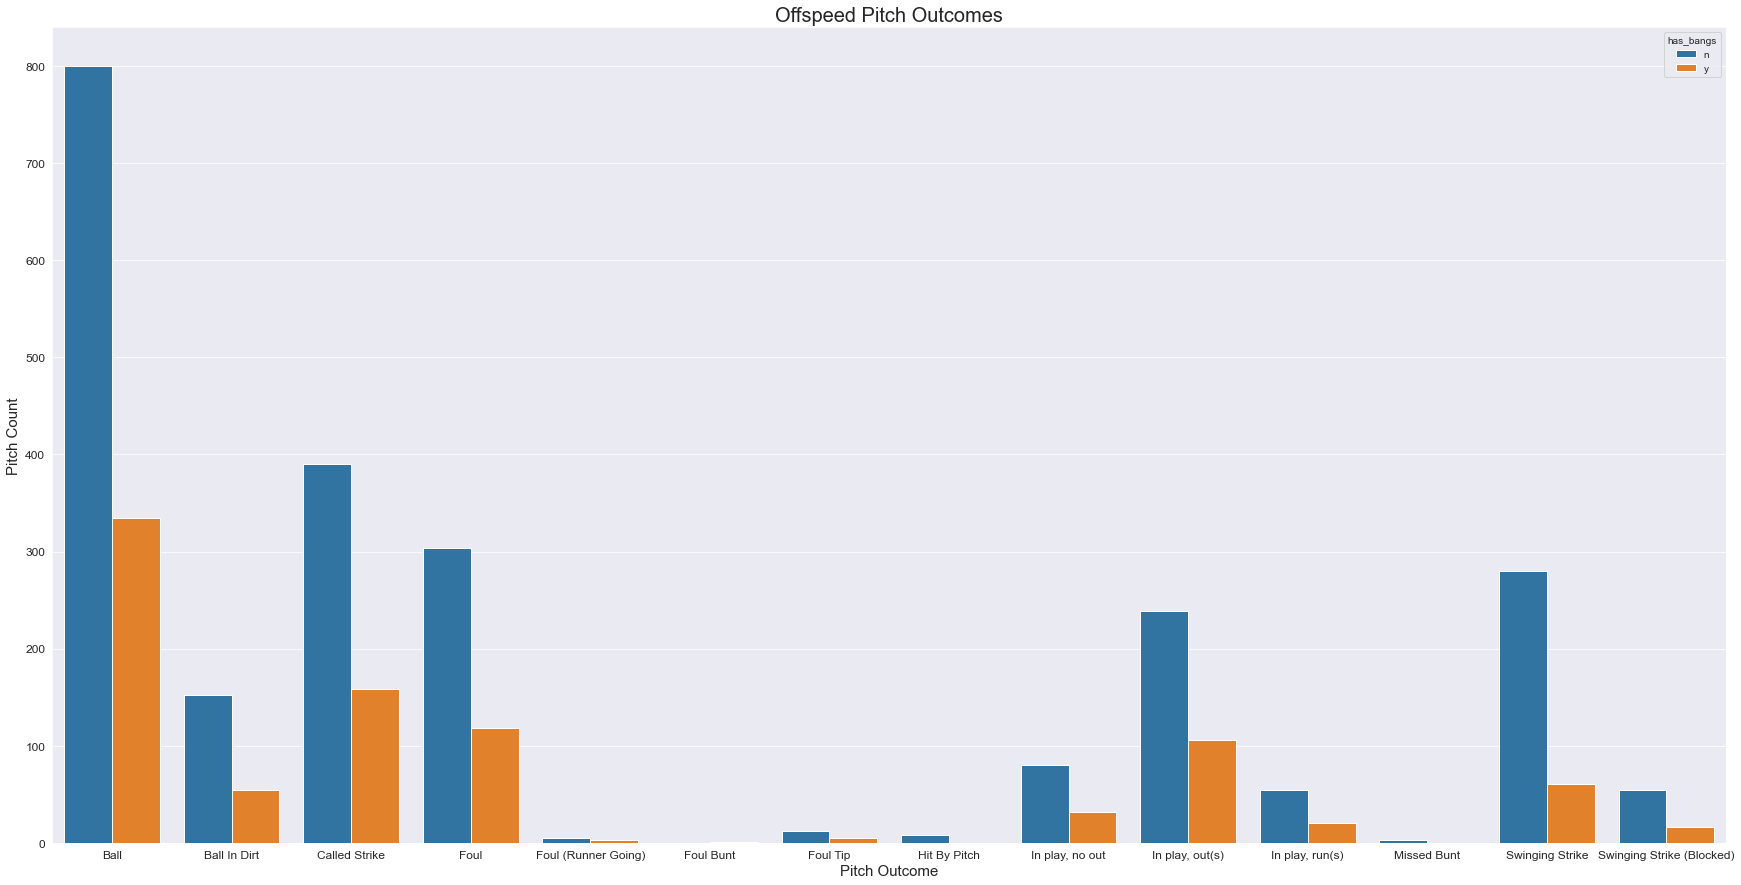

In [27]:

offspeed_as_y = offspeed_as[offspeed_as['offspeed'] == 1] # Outcomes of all offspeed pitches while comparing "has_bangs"
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
off_fig = sns.barplot(data= offspeed_as_y,x='description', y= 'count', hue='has_bangs')
off_fig.axes.set_title('Offspeed Pitch Outcomes',fontsize=20)
off_fig.set_ylabel('Pitch Count',fontsize=15)
off_fig.set_xlabel('Pitch Outcome',fontsize=15)
off_fig.tick_params(labelsize=12, rotation=0 )

In [28]:
# DO the same as above for at_bat_event
offspeed_ab = ab.groupby(['at_bat_event','has_bangs','offspeed'])['at_bat_event'].count()
offspeed_ab = pd.DataFrame(data=offspeed_ab)
offspeed_ab.rename(columns={'at_bat_event':'count'},inplace=True)
offspeed_ab = offspeed_ab.reset_index()
#offspeed_ab


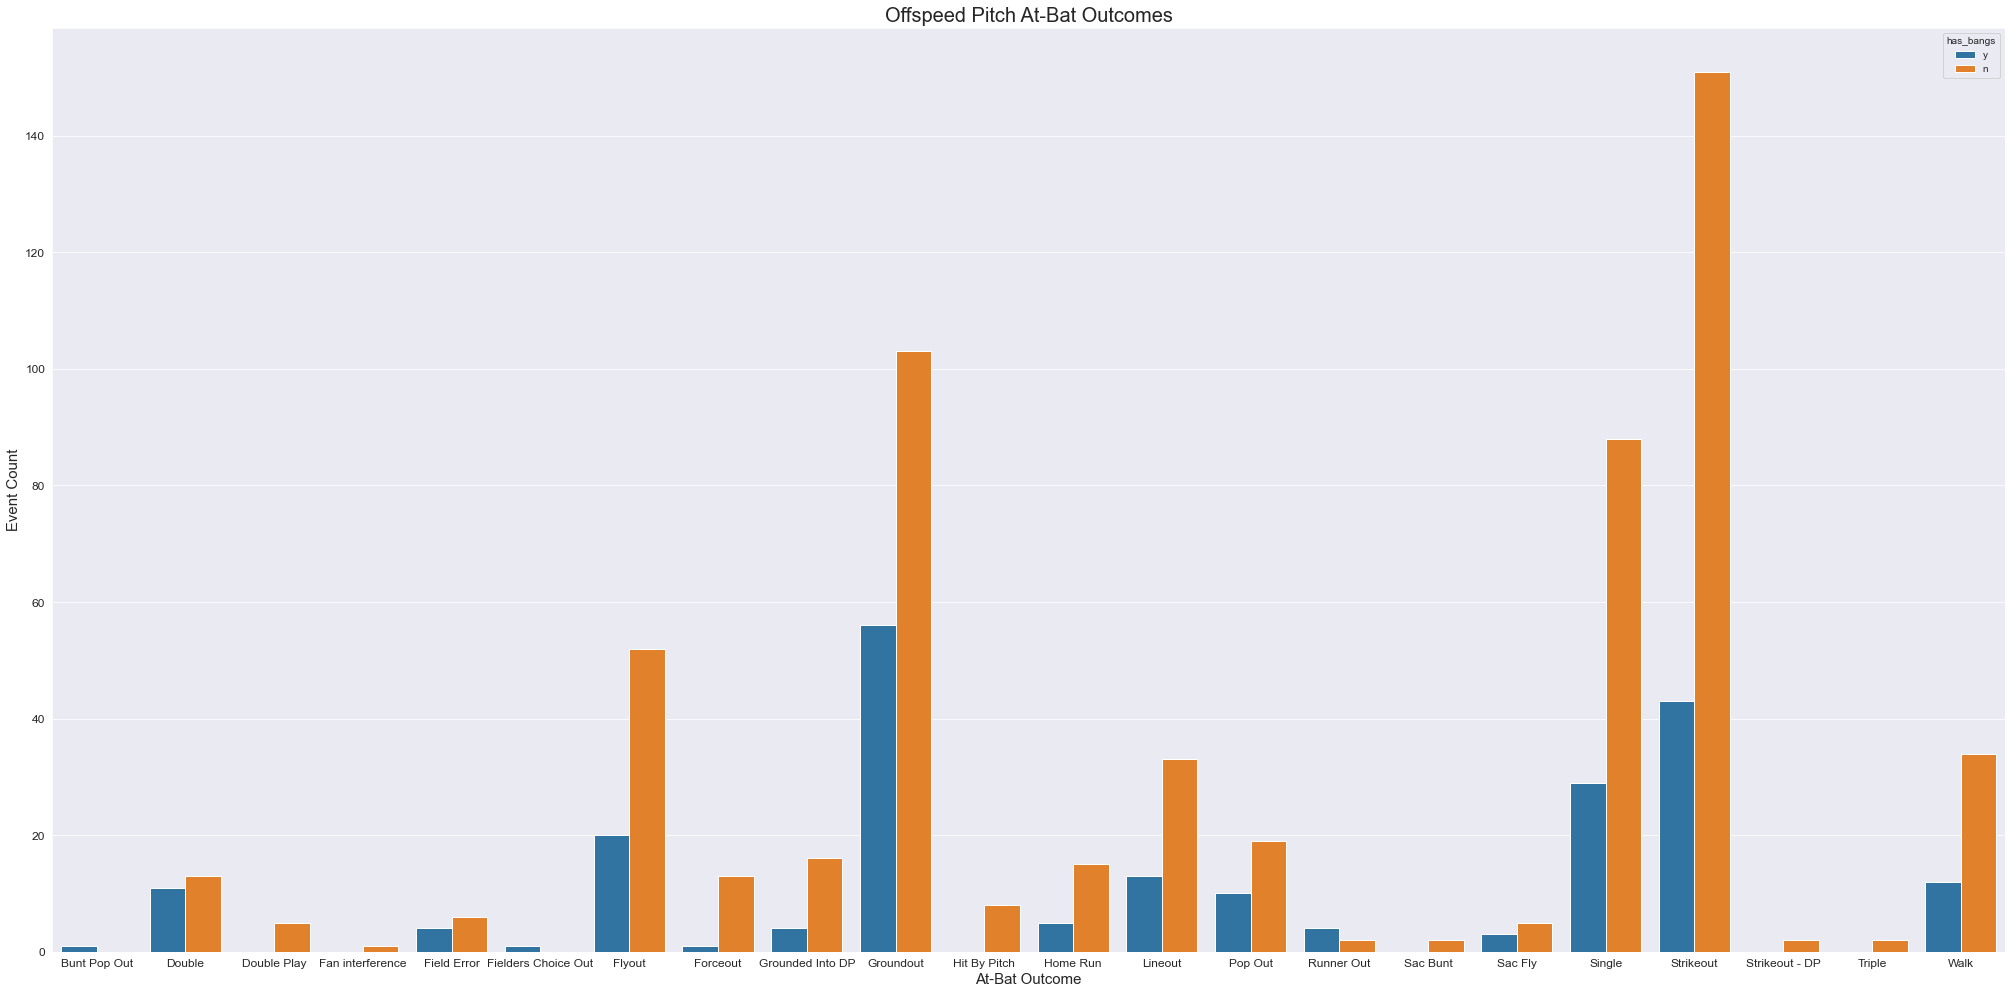

In [29]:
offspeed_ab_y = offspeed_ab[offspeed_ab['offspeed'] == 1] # Looks at only offspeed pitches that determine AB outcome that filter by "has_bangs"
plt.figure(figsize=(35,17))
sns.set_style('darkgrid')
offs_fig = sns.barplot(data= offspeed_ab_y,x='at_bat_event', y= 'count', hue='has_bangs')
offs_fig.axes.set_title('Offspeed Pitch At-Bat Outcomes',fontsize=20)
offs_fig.set_ylabel('Event Count',fontsize=15)
offs_fig.set_xlabel('At-Bat Outcome',fontsize=15)
offs_fig.tick_params(labelsize=12, rotation=0 )